# **Advanced Digital Signal Processing (ADSP) Lab - Python Lab Manual**
> **Course Code:** EEE G613 \
**Instructer in Charge:** Dr. Rajesh Kumar Tripathy \
**Teaching Assistant:** Shaswati Dash\
**Lab Technician:** Ramesh Pokanati





**********************************************
**********************************************

# **Experiment No. - 5**

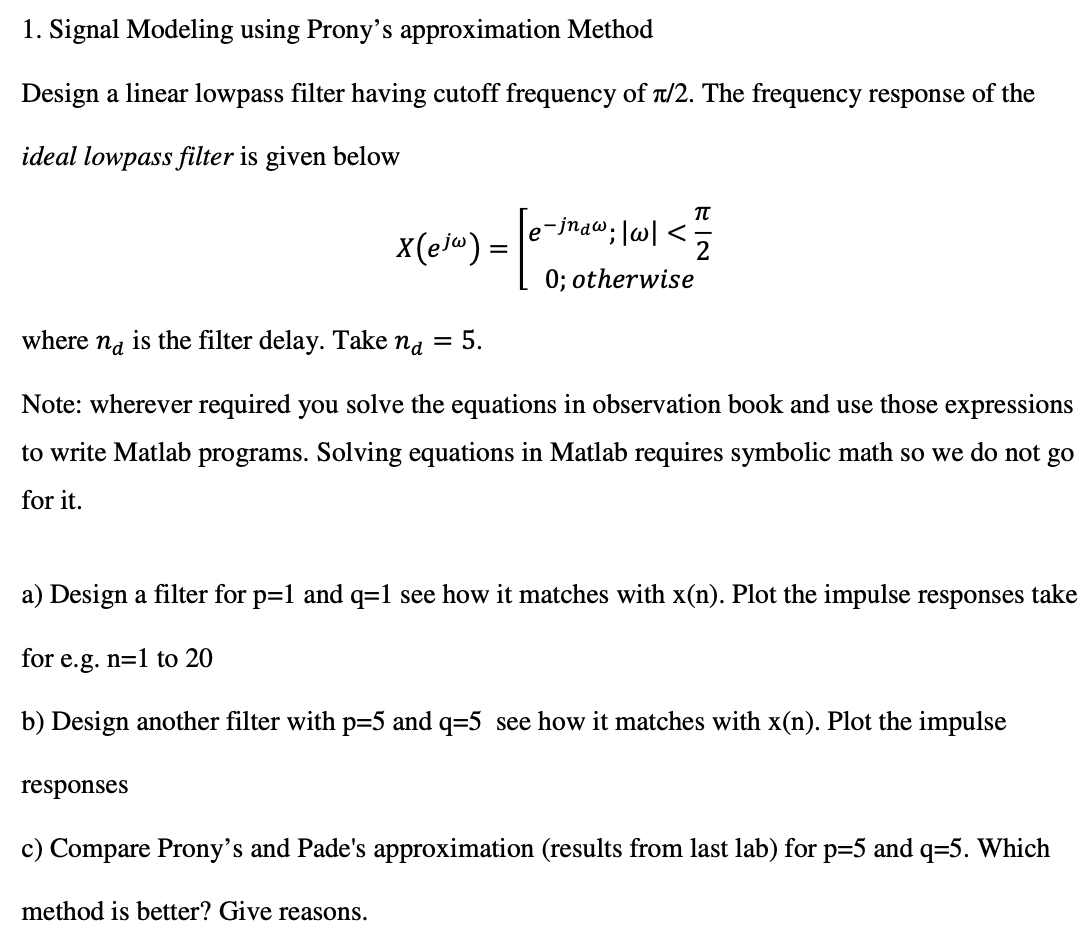

# *Python Code- Part (a):*

In [7]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter
import time

In [8]:
start_time = time.time()
# Part a
I_a = np.zeros(21)
for n in range(21):
  if n != 5:
    I_a[n] = np.sin((n - 5) * (np.pi / 2)) / ((n - 5) * np.pi)
  else:
    I_a[n] = 0.5

n_a = len(I_a)
p_a = 1
q_a = 1
I_a = np.append(I_a, np.zeros(2 * p_a))
Rxx_a = np.zeros((p_a + 1, p_a + 1))
for l in range(p_a + 1):
  for k in range(p_a + 1):
    rxx = []
    for i in range(q_a + 1, n_a):
      if i - l > 0 and i - k > 0:
        rxx.append(I_a[i - l] * I_a[i - k])
    Rxx_a[k, l] = sum(rxx)

rxk_a = Rxx_a[1:, 0]
a_a = -np.linalg.solve(Rxx_a[1:, 1:], rxk_a)
b_a = np.zeros(q_a + 1)

for i in range(q_a + 1):
  aa = [0]
  for k in range(p_a):
    if i + 1 - k > 0:
      aa.append(a_a[k] * I_a[i + 1 - k])
    b_a[i] = I_a[i] + sum(aa)

j_a = len(I_a) - 1
o_a = np.zeros(j_a)
o_a = np.append(1, o_a)
a_a = np.append(1, a_a)
h_a = lfilter(b_a, a_a, o_a)
error_a = I_a[:n_a] - h_a[:n_a]

# *Python Code- Part (b):*

In [9]:
# Part b
I_b = np.zeros(21)
for n in range(21):
  if n != 5:
    I_b[n] = np.sin((n - 5) * (np.pi / 2)) / ((n - 5) * np.pi)
  else:
    I_b[n] = 0.5

n_b = len(I_b)
p_b = 5
q_b = 5
I_b = np.append(I_b, np.zeros(2 * p_b))
Rxx_b = np.zeros((p_b + 1, p_b + 1))
for l in range(p_b + 1):
  for k in range(p_b + 1):
    rxx = []
    for i in range(q_b + 1, n_b):
      if i - l > 0 and i - k > 0:
        rxx.append(I_b[i - l] * I_b[i - k])
    Rxx_b[k, l] = sum(rxx)

rxk_b = Rxx_b[1:, 0]
a_b = -np.linalg.solve(Rxx_b[1:, 1:], rxk_b)
b_b = np.zeros(q_b + 1)
for i in range(q_b + 1):
  aa = [0]
  for k in range(p_b):
    if i + 1 - k > 0:
      aa.append(a_b[k] * I_b[i + 1 - k])
  b_b[i] = I_b[i] + sum(aa)

j_b = len(I_b) - 1
o_b = np.zeros(j_b)
o_b = np.append(1, o_b)
a_b = np.append(1, a_b)
h_b = lfilter(b_b, a_b, o_b)
error_b = I_b[:n_b] - h_b[:n_b]

# *Python Code- Part (c):*

In [10]:
# Part c - Prony
I_c = np.zeros(21)
for n in range(21):
  if n != 5:
    I_c[n] = np.sin((n - 5) * (np.pi / 2)) / ((n - 5) * np.pi)
  else:
    I_c[n] = 0.5

n_c = len(I_c)
p_c = 5
q_c = 5
I_c = np.append(I_c, np.zeros(2 * p_c))
Rxx_c = np.zeros((p_c + 1, p_c + 1))
for l in range(p_c + 1):
  for k in range(p_c + 1):
    rxx = []
    for i in range(q_c + 1, n_c):
      if i - l > 0 and i - k > 0:
        rxx.append(I_c[i - l] * I_c[i - k])
    Rxx_c[k, l] = sum(rxx)

rxk_c = Rxx_c[1:, 0]
a_c = -np.linalg.solve(Rxx_c[1:, 1:], rxk_c)
b_c = np.zeros(q_c + 1)
for i in range(q_c + 1):
  aa = [0]
  for k in range(p_c):
    if i + 1 - k > 0:
      aa.append(a_c[k] * I_c[i + 1 - k])
  b_c[i] = I_c[i] + sum(aa)

j_c = len(I_c) - 1
o_c = np.zeros(j_c)
o_c = np.append(1, o_c)
a_c = np.append(1, a_c)
h1_c = lfilter(b_c, a_c, o_c)

# Part c - Pade
p_c = 5
q_c = 5
x_c = np.zeros(21)
for n in range(21):
  if n != 5:
    x_c[n] = np.sin((n - 5) * (np.pi / 2)) / ((n - 5) * np.pi)
  else:
    x_c[n] = 0.5

x_c = np.append(x_c, np.zeros(2 * (p_c + 1)))
N = len(x_c) + 2 * (p_c + 1) - 2
x_c_pad = np.pad(x_c, (p_c, p_c), 'constant')
X_c = np.zeros((N - p_c, p_c + 1))
for i in range(p_c + 1):
  X_c[:, i] = x_c_pad[p_c - i:N - i]

Xq = X_c[q_c + 1:q_c + p_c + 2, 1:p_c + 1]
xqplus1 = X_c[q_c + 1:q_c + p_c + 2, 0]
# Solve the linear system using least squares (lstsq) instead of solve
apb, residuals, _, _ = np.linalg.lstsq(Xq, xqplus1, rcond=None)
a_c_pade = np.insert(apb, 0, 1)
b_c_pade = X_c[0:q_c + 1, 0:p_c + 1].dot(a_c_pade)
h2_c = lfilter(b_c_pade, a_c_pade, x_c)
error_c_pade = x_c[:n_c] - h2_c[:n_c]

# Calculate elapsed runtime
elapsed_time = time.time() - start_time
print(f"\nElapsed Runtime: {elapsed_time:.4f} seconds\n")


Elapsed Runtime: 0.0473 seconds



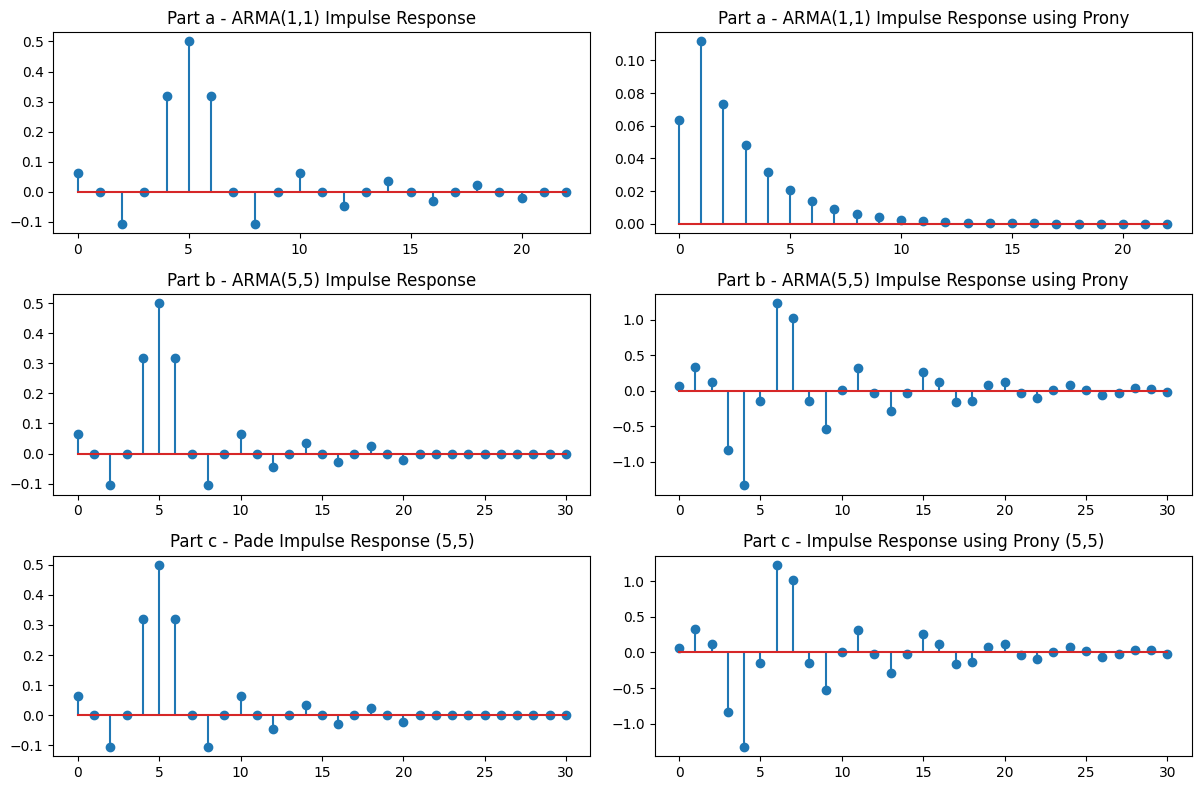

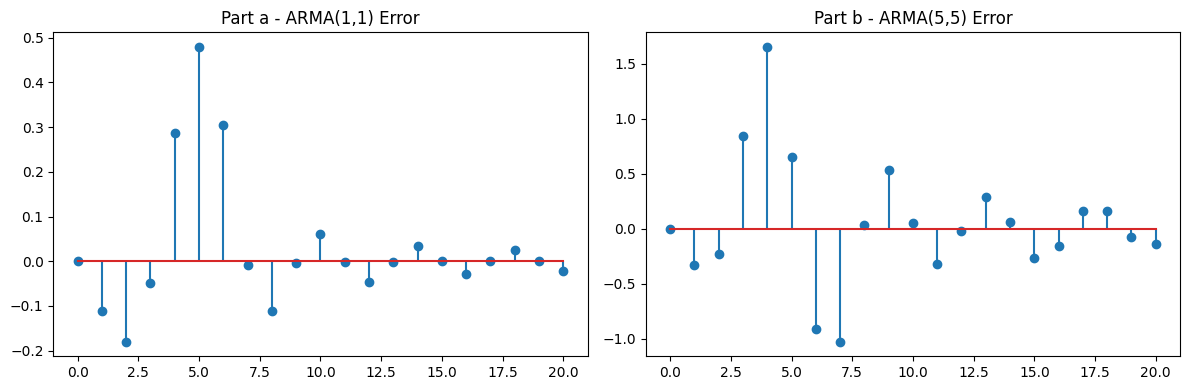

<Figure size 1200x400 with 0 Axes>

In [11]:
# Plot the impulse responses and errors
plt.figure(figsize=(12, 8))
plt.subplot(3, 2, 1)
plt.stem(I_a)
plt.title("Part a - ARMA(1,1) Impulse Response")
plt.subplot(3, 2, 2)
plt.stem(h_a)
plt.title("Part a - ARMA(1,1) Impulse Response using Prony")
plt.subplot(3, 2, 3)
plt.stem(I_b)
plt.title("Part b - ARMA(5,5) Impulse Response")
plt.subplot(3, 2, 4)
plt.stem(h_b)
plt.title("Part b - ARMA(5,5) Impulse Response using Prony")
plt.subplot(3, 2, 5)
plt.stem(I_c)
plt.title("Part c - Pade Impulse Response (5,5)")
plt.subplot(3, 2, 6)
plt.stem(h1_c)
plt.title("Part c - Impulse Response using Prony (5,5)")
plt.tight_layout()
plt.show()
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.stem(error_a)
plt.title("Part a - ARMA(1,1) Error")
plt.subplot(1, 2, 2)
plt.stem(error_b)
plt.title("Part b - ARMA(5,5) Error")
plt.tight_layout()
plt.show()
plt.figure(figsize=(12, 4))
plt.tight_layout()
plt.show()